# Notebook 1: Data Loading and Initial Visualization of Milling Signals
## Context Reminder:
A total of **43 slot milling experiments** were carried out on **Aluminum 7075** using the **DMG Mori Milltap 700** machining center. These experiments involved end mills with various diameters (**2 mm, 4 mm, 6 mm, 8 mm**, etc.) and were conducted under **different process parameters**, such as cutting speed, feed rate, and depth of cut.

The main objective of the overall project is to develop **AI-based models** capable of **predicting spindle current**, with the long-term goal of enabling **real-time process monitoring** and intelligent condition detection. During each experiment, multiple physical signals were recorded, including: Cutting forces, spindle current and axis currents.



## Objective of This Notebook:
In this notebook, we will start by loading and visualizing data from **a single experiment**, specifically one using a tool with a **6 mm diameter**. This will help us become familiar with the structure of the dataset and perform an initial exploratory analysis, before scaling up to the full set of experiments in later stages.


In this section, we import the necessary Python libraries:

- `pandas` for handling tabular data  
- `numpy` for numerical operations  

Then we load the dataset `"25_D6_Al_Rough_1.csv"` into a `pandas.DataFrame` and display the first few rows to get an overview of the data.


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("25_D6_Al_Rough_1.csv")

print(df.head())

                 Name  FORCE_X  FORCE_Y  FORCE_Z      Fx_N      Fy_N  \
0  133674057501480000       -5      -49       13 -0.076296 -0.747703   
1  133674057501530000       28       -3        1  0.427259 -0.045778   
2  133674057501580000       -7       35       12 -0.106815  0.534074   
3  133674057501630000      -13       10       17 -0.198370  0.152592   
4  133674057501680000        5      -65       14  0.076296 -0.991851   

       Fz_N  PROCESS_FORCE  ACT_POSITION_X  ACT_POSITION_Y  ...  \
0  0.396740              0       20.224358      187.373657  ...   
1  0.030519              0       20.224358      187.373459  ...   
2  0.366222              0       20.224297      187.373400  ...   
3  0.518814              0       20.224297      187.373400  ...   
4  0.427259              0       20.224306      187.373642  ...   

   ACT_CURRENT_S  ACTIVE_TOOL_CUTTING_EDGE_NUMBER  ACTIVE_TOOL_RADIUS  \
0       0.000000                                0              2.9907   
1       0.000000  

## Exercise: Visualize the spindle current signal

In this exercise, you will plot the spindle current (`ACT_CURRENT_S`) over time.

- Since the dataset does **not** contain an explicit time or index column, use the **length of the signal** as the x-axis.
- Fill in the missing parts of the code below to create a line plot of the spindle current.

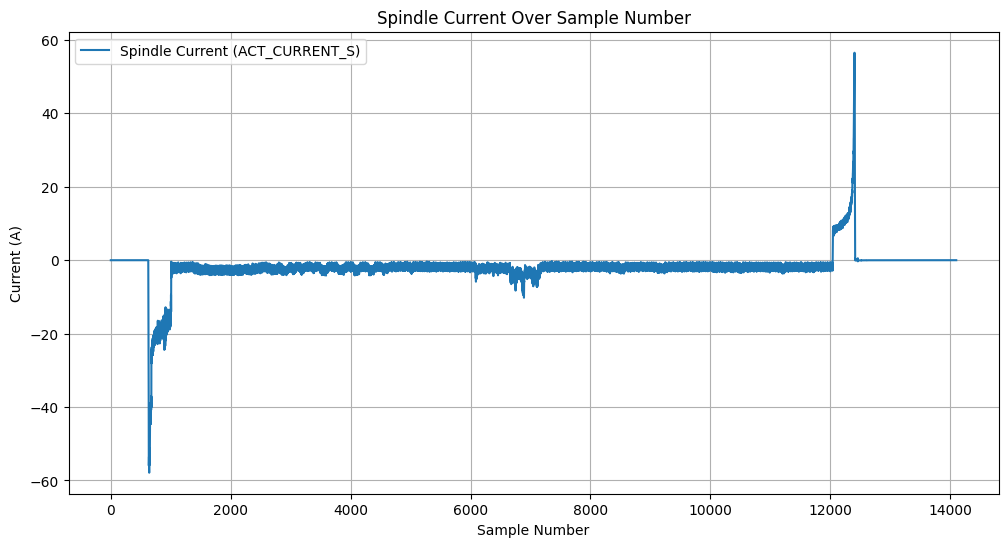

In [4]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Select the spindle current "ACT_CURRENT_S" column from the DataFrame
spindle_current = df["ACT_CURRENT_S"]  # fill in the correct column name here

# Create a time axis as a sequence from 0 to length of the signal - 1
index = range(len(spindle_current))  # Length of the signal

# Plot spindle current over time
plt.figure(figsize=(12, 6))
plt.plot(index, spindle_current, label="Spindle Current (ACT_CURRENT_S)")  
plt.xlabel("Sample Number")
plt.ylabel("Current (A)")
plt.title("Spindle Current Over Sample Number")
plt.legend()
plt.grid(True)
plt.show()

## Interpretation of the Spindle Current Signal

At the beginning of the signal, the spindle moves from rest to the machining position. The sharp current spike is caused by motor acceleration as the spindle ramps up its speed. Towards the end of the signal, the spindle decelerates and returns to its rest position.

---

### Additional Notes:

- The signal is quite noisy and contains fluctuations that require filtering for meaningful analysis.  
- Parts of the signal where the tool is **not in contact with the workpiece** can be removed to focus on the relevant data.  
- For a better understanding of the process, you may also consider plotting other measured signals, such as:
  - **Cutting forces:** `FORCE_X`, `FORCE_Y`, `FORCE_Z`  
  - **Axis positions:** `ACT_POSITION_X`, `ACT_POSITION_Y`, `ACT_POSITION_Z`  
  - **Axis currents:** `ACT_CURRENT_X`, `ACT_CURRENT_Y`, `ACT_CURRENT_Z`  
These provide complementary insights into the milling operation.
